In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
configPath = '/content/drive/MyDrive/drone/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozenpath = '/content/drive/MyDrive/drone/frozen_inference_graph.pb'

In [ ]:
model = cv2.dnn_DetectionModel(configPath, frozenpath)

In [ ]:
classNames= []
classFile = '/content/drive/MyDrive/drone/coco.names'
with open(classFile,'rt') as f:
    classNames = f.read().rstrip('\n').split('\n')

In [ ]:
print(classNames)

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush']


In [ ]:
len(classNames)

91

In [ ]:
model.setInputSize(320,320)
model.setInputScale(1.0/ 127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0x7d760d6a78b0>

In [ ]:
img = cv2.imread('/content/drive/MyDrive/drone/john-arano-LzxsSWAVMYs-unsplash.jpg')

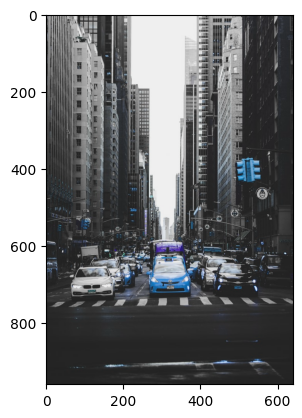

In [ ]:
plt.imshow(img)

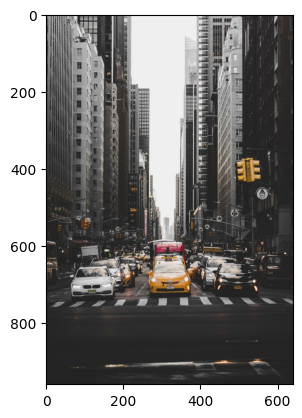

In [ ]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [ ]:
classIds, confs, bbox = model.detect(img,confThreshold=0.5)

In [ ]:
print(classIds)

[ 3  3  3 10  3  3  3  3  3  3  3  3  3 10  1 10  3 10 10]


In [ ]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for classId, confidence,box in zip(classIds.flatten(),confs.flatten(),bbox):
    cv2.rectangle(img,box,(255,0,0),2)
    cv2.putText(img,classNames[classId-1],(box[0]+10,box[1]+40),font,font_scale,color=(255,0,0),thickness=3)

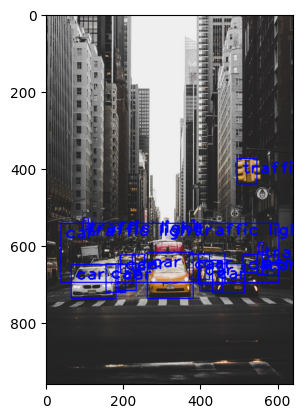

In [ ]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

cap = cv2.VideoCapture('/content/drive/MyDrive/Untitled folder/141251 (1080p).mp4')

# Define the codec and create VideoWriter object to save the video
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.mp4', fourcc, 20.0, (640, 480))

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Your detection logic here
    # For example, if you're using a DNN model, you would perform inference on the 'frame'
    # and obtain classIds, confs, bbox

    # Draw rectangles and text for each detection
    for classId, confidence, box in zip(classIds.flatten(), confs.flatten(), bbox):
        cv2.rectangle(frame, box, (255, 0, 0), 2)
        cv2.putText(frame, classNames[classId-1], (box[0]+10, box[1]+40), font, font_scale, color=(255, 0, 0), thickness=3)

    # Write the frame into the file 'output_video.avi'
    out.write(frame)

    # Display the resulting frame (optional)
    #cv2_imshow(frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release everything when done
cap.release()
out.release()
cv2.destroyAllWindows()